### Doğrusal Regresyonda Tahmin İşlemleri

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('datasets/advertising.csv')
df

In [2]:
df.shape

(200, 4)

In [3]:
# Örneklendirmek adına yani regresyonun temel mantığını kavrayabilmek için bu dataframe içerisinden 2 tane değişkeni seçelim:
x = df[["TV"]]

# bağımlı değişkenimiz...
y = df[["sales"]]

###### Model

In [4]:
reg_model = LinearRegression().fit(x, y)

# sabit (b - bias)
reg_model.intercept_[0]

7.032593549127695

In [5]:
# w (tv'nin katsayısı - w1)
reg_model.coef_[0][0]

0.04753664043301975

### Tahmin

In [6]:
# 150 birimlik TV harcaması olsa ne kadar satış olması beklenir?
reg_model.intercept_[0] + reg_model.coef_[0][0] * 150

14.163089614080658

In [7]:
# 500 birimlik TV harcaması olursa beklenen satış ne olur?
reg_model.intercept_[0] + reg_model.coef_[0][0] * 500

30.800913765637567

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


* DİKKAT : TV'nin maksimum değeri 296. Biz buraya 500 girdik. Yani bu şu anlama geliyor. Biz verinin özütünü öğrendik ya artık elimizdeki örnek veride gözlenmemiş bir değer de olsa biz bunu bu öğrendiğimiz modele sorabiliriz. Olmayan değere karşılık bile doğrusal modelde bir cevap bulabiliriz.

### Modelin Görselleştirilmesi

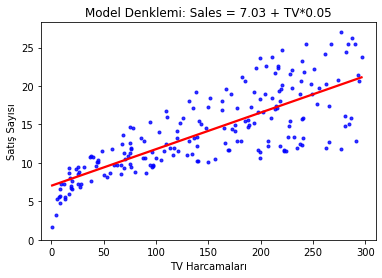

In [10]:
g = sns.regplot(x = x, y = y, scatter_kws={'color': 'b', 's': 9},
               ci=False, color = "r")

# ci Güven aralığı argümanıdır.

# Grafiğe ana başlık ekler: 2'ler ile grafik biçimlendirilmiştir.
g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")

# y ve x eksenlerinin isimlendirilmesi:
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")

plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [11]:
# Kırmızı çizgi modeldir. Tahmin doğrusudur.